# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw

ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0          8 a 11 anos         NaN         0.0         0.0  ...           5   
1          8 a 11 anos    999992.0         1.0         0.0  ...           5   
2          8 a 11 anos    513205.0         2.0         0.0  ...           5   
3      12 anos ou mais    231205.0         0.0         0.0  ...           4   
4          8 a 11 anos    999992.0         1.0         0.0  ...           5   
...                ...         ...         ...         ...  ...         ...   
27023  12 anos ou mais    333115.0         1.0         0.0  ...           5   
27024      8 a 11 anos    999992.0         0.0         0.0  ...           5   
27025      8 a 11 anos    421125.0         0.0         1.0  ...           5   
27026      8 a 11 anos    999992.0         1.0         0.0  ...           5   
27027      8 a 11 anos    999992.0         1.0         0.0  ...           5   

      CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0            1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1            2        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
2            3        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
3            4        ATIVO      MUNIC  Alto Alegre dos Parecis  Rondônia   
4            5        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
...        ...          ...        ...                      ...       ...   
27023  2767632        ATIVO      MUNIC                  Vilhena  Rondônia   
27024  2772678        ATIVO      MUNIC              Chupinguaia  Rondônia   
27025  2776905        ATIVO      MUNIC                  Vilhena  Rondônia   
27026  2777105        ATIVO      MUNIC                  Vilhena  Rondônia   
27027  2780269        ATIVO      MUNIC  Novo Horizonte do Oeste  Rondônia   

       munResLat munResLon  munResAlt  munResArea  
0      -11.93554 -61.99982      338.0    7067.025  
1      -11.93554 -61.99982      338.0    7067.025  
2      -11.93554 -61.99982      338.0    7067.025  
3      -12.13178 -61.85308      397.0    3958.273  
4      -11.93554 -61.99982      338.0    7067.025  
...          ...       ...        ...         ...  
27023  -12.74137 -60.13858      595.0   11518.915  
27024  -12.55684 -60.90185      340.0    5126.723  
27025  -12.74137 -60.13858      595.0   11518.915  
27026  -12.74137 -60.13858      595.0   11518.915  
27027  -11.70974 -61.99439      230.0     843.446  

[27028 rows x 69 columns]

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
#Para ter conhecimento de todas as colunas e seus tipos de dados para as consultas posteriores.
sinasc_raw.dtypes

ORIGEM            int64
CODESTAB        float64
CODMUNNASC        int64
LOCNASC           int64
IDADEMAE          int64
ESTCIVMAE       float64
ESCMAE           object
CODOCUPMAE      float64
QTDFILVIVO      float64
QTDFILMORT      float64
CODMUNRES         int64
GESTACAO         object
GRAVIDEZ         object
PARTO            object
CONSULTAS         int64
DTNASC           object
HORANASC        float64
SEXO             object
APGAR1          float64
APGAR5          float64
RACACOR          object
PESO              int64
IDANOMAL        float64
DTCADASTRO       object
CODANOMAL        object
NUMEROLOTE        int64
VERSAOSIST       object
DTRECEBIM        object
DIFDATA           int64
DTRECORIGA      float64
NATURALMAE      float64
CODMUNNATU      float64
CODUFNATU       float64
ESCMAE2010      float64
SERIESCMAE      float64
DTNASCMAE       float64
RACACORMAE      float64
QTDGESTANT      float64
QTDPARTNOR      float64
QTDPARTCES      float64
IDADEPAI        float64
DTULTMENST      

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [52]:
sinasclat = sinasc_raw[sinasc_raw['munResLat'].notna()]
sinasclat = sinasclat[['munResLat','CONSULTAS','APGAR1']]
sinasclat

munResLat  CONSULTAS  APGAR1
0      -11.93554          4     9.0
1      -11.93554          4     8.0
2      -11.93554          4     8.0
3      -12.13178          3     9.0
4      -11.93554          4     8.0
5      -11.93554          4     9.0
6      -11.70974          4     9.0
7      -11.93554          4     9.0
8      -11.93554          3     8.0
9      -11.93554          4     9.0
10     -11.93554          4     8.0
11     -11.93554          3     9.0
12     -11.93554          4     8.0
13     -11.93554          3     8.0
14     -11.93554          4     5.0
15     -11.93554          3     9.0
16     -11.93554          4     9.0
17     -11.93554          3     9.0
18     -11.93554          4     9.0
19     -11.93554          4     9.0
20     -11.93554          3     2.0
21     -11.72226          4     9.0
22     -11.93554          3     9.0
23     -12.13178          4     9.0
24     -12.13178          4     9.0
25     -11.93554          4     9.0
26     -11.93554          4     9.0
27     -11.93554          2     9.0
28     -11.93554          3     9.0
29     -11.93554          3     9.0
30     -11.93554          3     9.0
31     -11.93554          4     7.0
32     -11.93554          4     9.0
33     -11.93554          4     7.0
34     -11.93554          4     7.0
35     -11.93554          4     8.0
36     -11.93554          2     8.0
37     -11.93554          4     8.0
38     -11.93554          4     7.0
39     -11.93554          4     9.0
40     -11.93554          4     9.0
41     -11.93554          4     8.0
42     -11.93554          4     9.0
43     -11.91439          4     9.0
44     -11.93554          4     9.0
45     -11.93554          4     8.0
46     -11.93554          4     9.0
47     -11.93554          4     6.0
48     -11.93554          4     9.0
49     -11.93554          3     8.0
50     -11.93554          4     7.0
51     -11.93554          4     8.0
52     -11.93554          4     8.0
53     -11.93554          3     7.0
54     -11.93554          4     9.0
55     -11.93554          4     9.0
56     -11.93554          4     9.0
57     -11.93554          3     9.0
58     -11.93554          4     9.0
59     -11.93554          4     9.0
60     -11.93554          4     8.0
61     -11.93554          4     8.0
62     -11.93554          4     8.0
63     -11.93554          4     9.0
64     -11.93554          3     8.0
65     -11.93554          4     8.0
66     -11.93554          4     9.0
67     -11.93554          3     9.0
68     -11.93554          4     9.0
69     -11.93554          4     8.0
70     -11.93554          4     8.0
71     -11.93554          4     7.0
72      -9.90846          4     7.0
73      -9.37819          4     7.0
74      -9.90846          4     9.0
75      -9.71667          3     8.0
76      -9.90846          4     9.0
77     -10.26310          4     9.0
78      -9.71667          4     9.0
79      -9.90846          4     9.0
80      -9.90846          4    10.0
81     -10.26310          3     9.0
82      -9.90846          4     8.0
83     -10.43595          3     9.0
84     -11.93554          2     9.0
85     -11.93554          3     8.0
86     -11.93554          4     9.0
87     -11.93554          4     9.0
88     -11.72226          3     9.0
89     -11.93554          4     9.0
90     -12.13178          4     9.0
91     -11.93554          2     8.0
92     -11.93554          4     8.0
93     -11.93554          3     8.0
94     -11.93554          4     8.0
95     -11.93554          4     7.0
96     -11.93554          4     7.0
97     -11.70974          3     7.0
98     -11.93554          4     8.0
99     -11.93554          4     8.0
100    -11.93554          4     8.0
101    -11.93554          4     8.0
102    -11.93554          3     9.0
103    -11.93554          4     9.0
104    -11.93554          4     9.0
105    -12.13178          4     9.0
106    -11.93554          4     9.0
107    -11.93554          4     9.0
108    -11.93554          3     9.0
109    -11.93554          4     9.0
110    -11.

In [51]:
sinasclat['munResLat'].sort_values(ascending=True)

25681   -13.49976
25927   -13.49976
25553   -13.49976
11425   -13.49976
25965   -13.49976
25568   -13.49976
25579   -13.49976
25274   -13.49976
25606   -13.49976
11743   -13.49976
25232   -13.49976
25637   -13.49976
25219   -13.49976
25655   -13.49976
11649   -13.49976
25177   -13.49976
12408   -13.49976
11624   -13.49976
11618   -13.49976
11431   -13.49976
25283   -13.49976
25313   -13.49976
25511   -13.49976
25410   -13.49976
25949   -13.49976
25440   -13.49976
12459   -13.49976
25950   -13.49976
12356   -13.49976
25405   -13.49976
12351   -13.49976
12345   -13.49976
12480   -13.49976
25366   -13.49976
12519   -13.49976
12319   -13.49976
25331   -13.49976
25490   -13.49976
11790   -13.49976
11777   -13.49976
12265   -13.49976
25329   -13.49976
25691   -13.49976
25704   -13.49976
12434   -13.49976
25035   -13.49976
25020   -13.49976
25006   -13.49976
11847   -13.49976
12052   -13.49976
20761   -13.49976
12035   -13.49976
25722   -13.49976
19526   -13.49976
25863   -13.49976
11994   -1

In [38]:
LatSplit = pd.cut(sinasclat['munResLat'],[-13.49976,-10.5,-8.76889])
sinasclat.pivot_table(['CONSULTAS','APGAR1'],[LatSplit], 
                      aggfunc = {'CONSULTAS':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std')],
                                'APGAR1':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std')]})

APGAR1                                           CONSULTAS  \
                 desv_pad mediana máximo     média mínimo      soma  desv_pad   
munResLat                                                                       
(-13.5, -10.5]   0.961619     8.0   10.0  8.069177    0.0  103931.0  0.644439   
(-10.5, -8.769]  1.002839     8.0   10.0  8.199771    0.0  114559.0  0.888240   

                                                          
                mediana máximo     média mínimo     soma  
munResLat                                                 
(-13.5, -10.5]      4.0    9.0  3.693177    1.0  47690.0  
(-10.5, -8.769]     4.0    9.0  3.467436    1.0  48662.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [48]:
sinascarea = sinasc_raw[sinasc_raw['munResArea'].notna()]
sinascarea = sinascarea[['munResArea','SEMAGESTAC','ESCMAE2010']]
sinascarea['munResArea'].sort_values(ascending = True)

5469       459.978
17881      459.978
19133      459.978
5385       459.978
17832      459.978
19113      459.978
17768      459.978
5160       459.978
19833      459.978
5398       459.978
5176       459.978
17722      459.978
5403       459.978
5189       459.978
5611       459.978
5335       459.978
4199       459.978
4647       459.978
3558       459.978
18920      459.978
17988      459.978
18154      459.978
19287      459.978
18789      459.978
18799      459.978
19290      459.978
18805      459.978
19293      459.978
18362      459.978
19215      459.978
18859      459.978
19205      459.978
5018       459.978
19179      459.978
5352       459.978
5079       459.978
5085       459.978
18163      459.978
5093       459.978
5106       459.978
5550       459.978
17880      459.978
19280      459.978
5266       459.978
5438       459.978
19038      459.978
3861       459.978
3820       459.978
6637       459.978
4003       459.978
18956      459.978
4659       459.978
12754      4

In [49]:
AreaSplit = pd.cut(sinascarea['munResArea'],[459.978,3000,34096.394])
sinascarea.pivot_table(['SEMAGESTAC','ESCMAE2010'],[AreaSplit], 
                      aggfunc = {'SEMAGESTAC':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std'),('variancia','var')],
                                'ESCMAE2010':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std'),('variancia','var')]})

ESCMAE2010                                           \
                      desv_pad mediana máximo     média mínimo     soma   
munResArea                                                                
(459.978, 3000.0]     1.073345     3.0    9.0  3.055556    0.0  15620.0   
(3000.0, 34096.394]   1.094459     3.0    9.0  3.037543    0.0  65617.0   

                              SEMAGESTAC                                   \
                    variancia   desv_pad mediana máximo      média mínimo   
munResArea                                                                  
(459.978, 3000.0]    1.152069   1.875715    39.0   45.0  38.469637   21.0   
(3000.0, 34096.394]  1.197841   2.049838    39.0   45.0  38.591547   19.0   

                                         
                         soma variancia  
munResArea                               
(459.978, 3000.0]    195118.0  3.518305  
(3000.0, 34096.394]  797147.0  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
sinascalt = sinasc_raw[sinasc_raw['munResAlt'].notna()]
sinascalt = sinascalt[['munResAlt','QTDFILMORT','QTDFILVIVO']]
sinascalt['munResAlt'].sort_values(ascending = True)

7521      85.0
8786      85.0
23937     85.0
10277     85.0
10275     85.0
         ...  
25795    595.0
25794    595.0
25793    595.0
25807    595.0
11557    595.0
Name: munResAlt, Length: 27027, dtype: float64

In [12]:
#Decidindo um pontop de quebra.
sinascalt.median()

munResAlt     153.0
SEMAGESTAC     39.0
ESCMAE2010      3.0
dtype: float64

In [19]:
AltSplit = pd.cut(sinascalt['munResAlt'],[85.0,153,595.0])
sinascalt.pivot_table(['QTDFILMORT','QTDFILVIVO'],[AltSplit], 
                      aggfunc = {'QTDFILMORT':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std'),('variancia','var')],
                                'QTDFILVIVO':[('média','mean'),('soma','sum'),('mínimo','min'),
                                 ('máximo','max'),('mediana','median'),('desv_pad','std'),('variancia','var')]})

QTDFILMORT                                                   QTDFILVIVO                                                   
                 desv_pad mediana máximo     média mínimo    soma variancia   desv_pad mediana máximo     média mínimo     soma variancia
munResAlt                                                                                                                                
(85.0, 153.0]    0.642765     0.0    9.0  0.300289    0.0  3429.0  0.413147   1.260605     1.0   14.0  1.175684    0.0  13973.0  1.589126
(153.0, 595.0]   0.586806     0.0   28.0  0.236394    0.0  3123.0  0.344341   1.060187     1.0   30.0  0.936157    0.0  12420.0  1.123996

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [20]:
Imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Porto Velho",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [50]:
sinascPrep = sinasc_raw[['IDADEMAE','DTNASC','munResNome']]
sinascImed = sinascPrep.replace({'munResNome' : Imediatas})
sinascImed

IDADEMAE      DTNASC munResNome
0            19  2019-02-19     Cacoal
1            29  2019-02-21     Cacoal
2            37  2019-02-25     Cacoal
3            30  2019-03-20     Cacoal
4            30  2019-03-23     Cacoal
...         ...         ...        ...
27023        32  2019-12-13    Vilhena
27024        19  2019-10-04    Vilhena
27025        24  2019-08-02    Vilhena
27026        21  2019-12-23    Vilhena
27027        18  2019-12-27     Cacoal

[27028 rows x 3 columns]

In [51]:
sinascImed.pivot_table(values = 'IDADEMAE', index = ['DTNASC','munResNome'],
                      aggfunc = 'mean')

IDADEMAE
DTNASC     munResNome            
2019-01-01 Ariquemes    28.000000
           Cacoal       23.250000
           Jaru         31.000000
           Ji-Paraná    24.142857
           Porto Velho  21.500000
...                           ...
2019-12-31 Cacoal       23.400000
           Jaru         23.333333
           Ji-Paraná    26.200000
           Porto Velho  25.826087
           Vilhena      23.857143

[2176 rows x 1 columns]

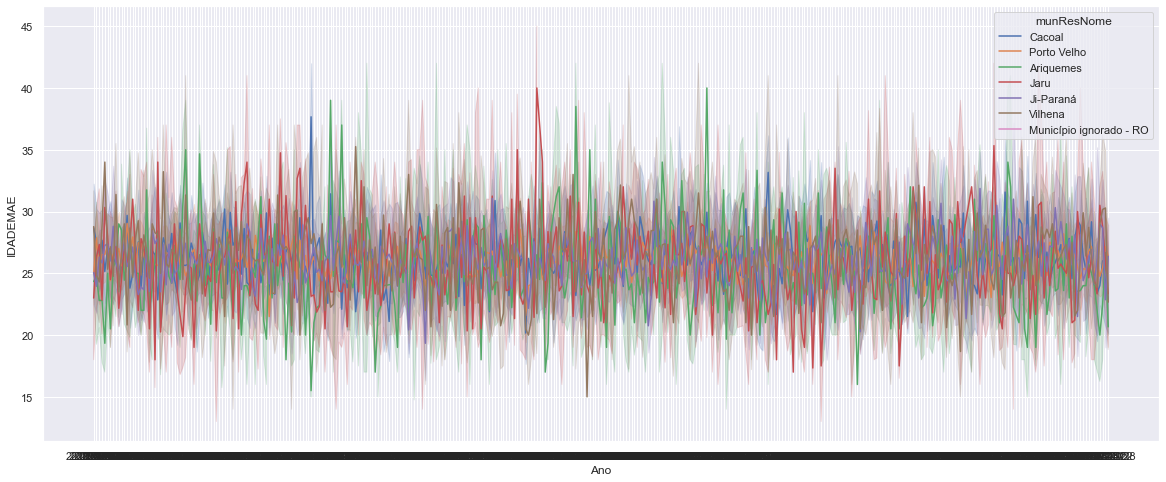

In [52]:
#Não tenho certeza se é esse o resultado de 'ao longo do tempo', o que presumi ser ao longo do ano de nascimento.
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.lineplot(x = 'DTNASC', y = 'IDADEMAE', hue = 'munResNome', data = sinascImed)
ax.set(xlabel = 'Ano')
plt.show()

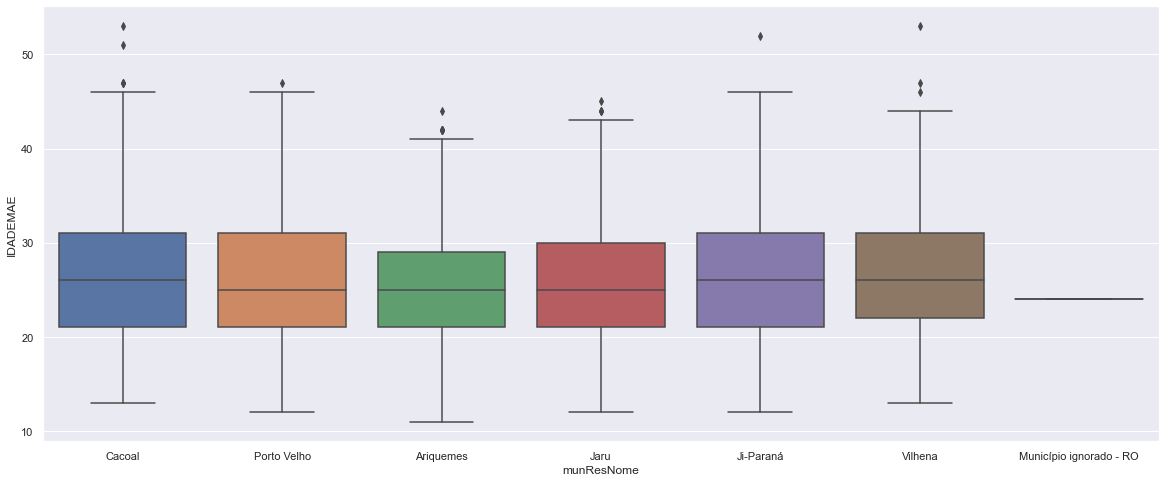

In [53]:
#alternativamente, um gráfico das idades médias por região imediata
ax2 = sns.boxplot(x = 'munResNome', y = 'IDADEMAE',data = sinascImed)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [45]:
IDH = {
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Nova Mamoré": "IDH-M baixo",
    "Porto Velho": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Ariquemes": "IDH-M alto",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}

In [54]:
sinascPrep2 = sinasc_raw[['IDADEMAE','ESCMAE','CONSULTAS','IDADEPAI','munResNome', 'APGAR5']]
sinascIDH = sinascPrep2.replace({'munResNome' : IDH})
sinascIDH.rename(columns = {'munResNome':'IDH'}, inplace=True)
sinascIDH

IDADEMAE           ESCMAE  CONSULTAS  IDADEPAI          IDH  APGAR5
0            19      8 a 11 anos          4      26.0  IDH-M médio    10.0
1            29      8 a 11 anos          4      24.0  IDH-M médio     9.0
2            37      8 a 11 anos          4      32.0  IDH-M médio    10.0
3            30  12 anos ou mais          3      24.0  IDH-M baixo    10.0
4            30      8 a 11 anos          4      27.0  IDH-M médio    10.0
...         ...              ...        ...       ...          ...     ...
27023        32  12 anos ou mais          4      35.0   IDH-M alto     9.0
27024        19      8 a 11 anos          4       NaN  IDH-M médio     9.0
27025        24      8 a 11 anos          4      30.0   IDH-M alto    10.0
27026        21      8 a 11 anos          4      24.0   IDH-M alto     9.0
27027        18      8 a 11 anos          4       NaN  IDH-M médio     8.0

[27028 rows x 6 columns]

In [56]:
sinascIDH.pivot_table(values = ['IDADEMAE','IDADEPAI','APGAR5'], index = ['IDH','ESCMAE'],
                      aggfunc = {'IDADEMAE':[('média','mean')],
                                'IDADEPAI':[('média','mean')],
                                'APGAR5':[('média','mean')]})

APGAR5   IDADEMAE   IDADEPAI
                                             média      média      média
IDH                     ESCMAE                                          
IDH-M alto              1 a 3 anos        8.975000  28.143357  33.333333
                        12 anos ou mais   9.247994  29.765963  32.998699
                        4 a 7 anos        9.137276  24.120684  30.411638
                        8 a 11 anos       9.154265  25.288771  29.954342
                        Nenhuma           9.086957  30.739130  45.500000
IDH-M baixo             1 a 3 anos        8.755102  28.918367  29.200000
                        12 anos ou mais   9.257919  28.756757  31.016129
                        4 a 7 anos        9.083732  24.691211  30.670000
                        8 a 11 anos       9.218018  24.707734  30.464684
                        Nenhuma           9.333333  30.333333  29.000000
IDH-M médio             1 a 3 anos        9.055249  28.751381  34.604651
                        12 anos ou mais   9.300773  29.042076  33.039275
                        4 a 7 anos        9.113232  25.468627  32.124682
                        8 a 11 anos       9.196551  24.992976  30.074803
                        Nenhuma           8.714286  33.214286  37.000000
Município ignorado - RO 8 a 11 anos      10.000000  24.000000  22.000000

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [3]:
IFDM = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Ariquemes": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado"
}

In [4]:
sinascPrep3 = sinasc_raw[['IDADEMAE','ESCMAE2010','PESO','IDADEPAI','munResNome', 'APGAR1']]
sinascIFDM = sinascPrep3.replace({'munResNome' : IFDM})
sinascIFDM.rename(columns = {'munResNome':'IFDM'}, inplace=True)
sinascIFDM

IDADEMAE  ESCMAE2010  PESO  IDADEPAI                      IFDM  APGAR1
0            19         3.0  3685      26.0  Desenvolvimento moderado     9.0
1            29         3.0  3055      24.0  Desenvolvimento moderado     8.0
2            37         3.0  3460      32.0  Desenvolvimento moderado     8.0
3            30         5.0  2982      24.0   Desenvolvimento regular     9.0
4            30         3.0  3310      27.0  Desenvolvimento moderado     8.0
...         ...         ...   ...       ...                       ...     ...
27023        32         5.0  2110      35.0  Desenvolvimento moderado     8.0
27024        19         3.0  3310       NaN  Desenvolvimento moderado     8.0
27025        24         3.0  3065      30.0  Desenvolvimento moderado     9.0
27026        21         3.0  2352      24.0  Desenvolvimento moderado     8.0
27027        18         3.0  4240       NaN   Desenvolvimento regular     7.0

[27028 rows x 6 columns]

In [8]:
sinascIFDM.pivot_table(values = ['IDADEMAE','IDADEPAI','APGAR1','PESO'], index = ['IFDM','ESCMAE2010'],
                      aggfunc = {'IDADEMAE':[('média','mean')],
                                'IDADEPAI':[('média','mean')],
                                'APGAR1':[('média','mean'),('máxima','max'),('mínima','min')],
                                'PESO':[('máxima','max'),('mínima','min')]})

APGAR1                    IDADEMAE  \
                                    máxima     média mínima      média   
IFDM                     ESCMAE2010                                      
Desenvolvimento moderado 0.0           9.0  7.900000    0.0  30.500000   
                         1.0          10.0  8.001348    0.0  28.641811   
                         2.0          10.0  8.116167    0.0  23.767820   
                         3.0          10.0  8.148690    0.0  25.571997   
                         4.0          10.0  8.224592    1.0  26.635795   
                         5.0          10.0  8.296700    0.0  31.020069   
                         9.0           9.0  8.197183    2.0  26.943662   
Desenvolvimento regular  0.0           9.0  8.500000    8.0  34.800000   
                         1.0          10.0  7.990291    1.0  29.267742   
                         2.0          10.0  7.964020    0.0  23.868017   
                         3.0          10.0  8.023710    0.0  25.181478   
                         4.0          10.0  8.109524    1.0  26.304762   
                         5.0          10.0  8.157113    1.0  29.974522   
                         9.0           9.0  7.666667    5.0  26.000000   
Município ignorado - RO  2.0           9.0  9.000000    9.0  24.000000   

                                      IDADEPAI   PESO         
                                         média máxima mínima  
IFDM                     ESCMAE2010                           
Desenvolvimento moderado 0.0         39.750000   4215    350  
                         1.0         34.724138   5720    600  
                         2.0         30.067308   5060    320  
                         3.0         29.883745   5020    258  
                         4.0         30.783636   5480    305  
                         5.0         33.878082   5190    292  
                         9.0         31.454545   4300   1170  
Desenvolvimento regular  0.0         36.000000   3845   2255  
                         1.0         36.533333   4785    500  
                         2.0         30.027174   5065    875  
                         3.0         30.844776   5985    460  
                         4.0         29.844828   4500    555  
                         5.0         33.108808   4940    425  
                         9.0         39.333333   4300   2770  
Município ignorado - RO  2.0         22.000000   3215   3215

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [27]:
PIB = {
    "Candeias do Jamari": "3 - Acima de 300 Milhões",
    "Guajará-Mirim": "2 - Acima de 500 Milhões",
    "Itapuã do Oeste": "5 - Acima de 100 Milhões",
    "Nova Mamoré": "3 - Acima de 300 Milhões",
    "Porto Velho": "1 - Acima de 1 Bilhão",
    "Alto Paraíso": "4 - Acima de 200 Milhões",
    "Ariquemes": "1 - Acima de 1 Bilhão",
    "Buritis": "3 - Acima de 300 Milhões",
    "Cacaulândia": "5 - Acima de 100 Milhões",
    "Campo Novo de Rondônia": "4 - Acima de 200 Milhões",
    "Cujubim": "4 - Acima de 200 Milhões",
    "Monte Negro": "4 - Acima de 200 Milhões",
    "Rio Crespo": "6 - Até 100 Milhões",
    "Jaru": "1 - Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "5 - Acima de 100 Milhões",
    "Machadinho D'Oeste": "3 - Acima de 300 Milhões",
    "Theobroma": "5 - Acima de 100 Milhões",
    "Vale do Anari": "5 - Acima de 100 Milhões",
    "Alvorada D'Oeste": "4 - Acima de 200 Milhões",
    "Costa Marques": "5 - Acima de 100 Milhões",
    "Ji-Paraná": "1 - Acima de 1 Bilhão",
    "Mirante da Serra": "5 - Acima de 100 Milhões",
    "Nova União": "6 - Até 100 Milhões",
    "Ouro Preto do Oeste": "2 - Acima de 500 Milhões",
    "Presidente Médici": "3 - Acima de 300 Milhões",
    "São Francisco do Guaporé": "4 - Acima de 200 Milhões",
    "São Miguel do Guaporé": "3 - Acima de 300 Milhões",
    "Seringueiras": "5 - Acima de 100 Milhões",
    "Teixeirópolis": "6 - Até 100 Milhões",
    "Urupá": "5 - Acima de 100 Milhões",
    "Vale do Paraíso": "5 - Acima de 100 Milhões",
    "Cacoal": "1 - Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "3 - Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "4 - Acima de 200 Milhões",
    "Castanheiras": "6 - Até 100 Milhões",
    "Espigão D'Oeste": "3 - Acima de 300 Milhões",
    "Ministro Andreazza": "5 - Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "4 - Acima de 200 Milhões",
    "Novo Horizonte do Oeste": "5 - Acima de 100 Milhões",
    "Parecis": "6 - Até 100 Milhões",
    "Pimenta Bueno": "2 - Acima de 500 Milhões",
    "Primavera de Rondônia": "6 - Até 100 Milhões",
    "Rolim de Moura": "1 - Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "5 - Acima de 100 Milhões",
    "São Felipe D'Oeste": "6 - Até 100 Milhões",
    "Vilhena": "1 - Acima de 1 Bilhão",
    "Cabixi": "5 - Acima de 100 Milhões",
    "Cerejeiras": "3 - Acima de 300 Milhões",
    "Chupinguaia": "5 - Acima de 100 Milhões",
    "Colorado do Oeste": "4 - Acima de 200 Milhões",
    "Corumbiara": "5 - Acima de 100 Milhões",
    "Pimenteiras do Oeste": "6 - Até 100 Milhões"
}

In [37]:
sinascPrep4 = sinasc_raw[['IDADEMAE','ESCMAE2010','PESO','IDADEPAI','munResNome','ESCMAEAGR1']]
sinascPIB = sinascPrep4.replace({'munResNome' : PIB})
sinascPIB.rename(columns = {'munResNome':'PIB'}, inplace=True)
sinascPIB.sort_values('PIB')

IDADEMAE  ESCMAE2010  PESO  IDADEPAI                      PIB  \
12471        38         4.0  3754      41.0    1 - Acima de 1 Bilhão   
12350        28         5.0  4250       NaN    1 - Acima de 1 Bilhão   
12349        41         3.0  2635       NaN    1 - Acima de 1 Bilhão   
12348        36         2.0  3460       NaN    1 - Acima de 1 Bilhão   
22130        25         3.0  2655       NaN    1 - Acima de 1 Bilhão   
...         ...         ...   ...       ...                      ...   
19257        35         1.0  2680      42.0      6 - Até 100 Milhões   
19251        26         3.0  3245      30.0      6 - Até 100 Milhões   
3605         28         3.0  3400       NaN      6 - Até 100 Milhões   
19169        25         4.0  3390      22.0      6 - Até 100 Milhões   
1863         24         2.0  3215      22.0  Município ignorado - RO   

       ESCMAEAGR1  
12471         7.0  
12350         8.0  
12349         6.0  
12348         3.0  
22130        12.0  
...           ...  
19257         2.0  
19251         6.0  
3605          6.0  
19169         7.0  
1863          4.0  

[27028 rows x 6 columns]

In [38]:
sinascPIB.pivot_table(values = ['IDADEMAE','IDADEPAI','PESO','ESCMAE2010','ESCMAEAGR1'], index = ['PIB'],
                      aggfunc = {'ESCMAE2010':[('média','mean')],
                                'ESCMAEAGR1':[('média','mean')],
                                'IDADEMAE':[('média','mean')],
                                'IDADEPAI':[('média','mean')],
                                'PESO':[('média','mean'),('máxima','max'),('mínima','min')]})

ESCMAE2010 ESCMAEAGR1   IDADEMAE   IDADEPAI    PESO  \
                              média      média      média      média  máxima   
PIB                                                                            
1 - Acima de 1 Bilhão      3.128562   7.373650  26.303914  31.279284  5720.0   
2 - Acima de 500 Milhões   2.963897   5.719585  25.666667  30.370044  5070.0   
3 - Acima de 300 Milhões   2.871824   6.417843  25.770418  30.715116  5985.0   
4 - Acima de 200 Milhões   2.880105   7.357592  25.618210  30.798122  4888.0   
5 - Acima de 100 Milhões   2.838525   6.273624  25.662910  31.602102  4810.0   
6 - Até 100 Milhões        2.934732   6.918415  26.515081  31.585185  4505.0   
Município ignorado - RO    2.000000   4.000000  24.000000  22.000000  3215.0   

                                               
                                média  mínima  
PIB                                            
1 - Acima de 1 Bilhão     3245.121086   292.0  
2 - Acima de 500 Milhões  3276.225345   285.0  
3 - Acima de 300 Milhões  3224.412012   345.0  
4 - Acima de 200 Milhões  3233.367822   258.0  
5 - Acima de 100 Milhões  3248.526639   425.0  
6 - Até 100 Milhões       3186.264501   320.0  
Município ignorado - RO   3215.000000  3215.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.
- O PIB parece influenciar a escolaridade 2010 das mães, mas não muito.
- A diferença de idade do pai e da mãe mantém consistentemente em 5 anos.
- Parece que o PIB maior influencia no possível peso máximo do bebê


https://github.com/IlsF33/EBAC